In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from a CSV file using pandas
df = pd.read_csv("/Users/vivanjain/Desktop/Python_with_venv/Fuel.csv")

In [3]:
# Display the dataset and its information for anaylsis in case of any missing values or null values

print(df)
print(df.info())

      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0 

In [4]:
# Selecting numeric columns for correlation analysis with CO2EMISSIONS column to decide which features to use
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
# Calculate the correlation between numeric columns and the target variable for the dataset
numeric_columns.corr()['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64

In [5]:
# Since the correlation is strong negative, transforming the data to make it more linear to CO2EMISSIONS
df['FUELCONSUMPTION_COMB_MPG'] = np.log(1/(df['FUELCONSUMPTION_COMB_MPG']))

In [6]:
# Selecting numeric columns for correlation analysis again after transforming fuel consumption mpg column
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
# Drop the MODELYEAR column as it is constant for all rows
numeric_columns.drop(columns="MODELYEAR", inplace=True)
numeric_columns.corr()['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_COMB_MPG    0.918451
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
Name: CO2EMISSIONS, dtype: float64

In [7]:
# Selecting features (X) and the target variable (y)
X = df[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE', 'FUELCONSUMPTION_HWY', 'CYLINDERS']]
y = df['CO2EMISSIONS']

# Spliting the dataset into training and testing sets (80% train, 20% test)
split_index = int(0.8 * len(df))

X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

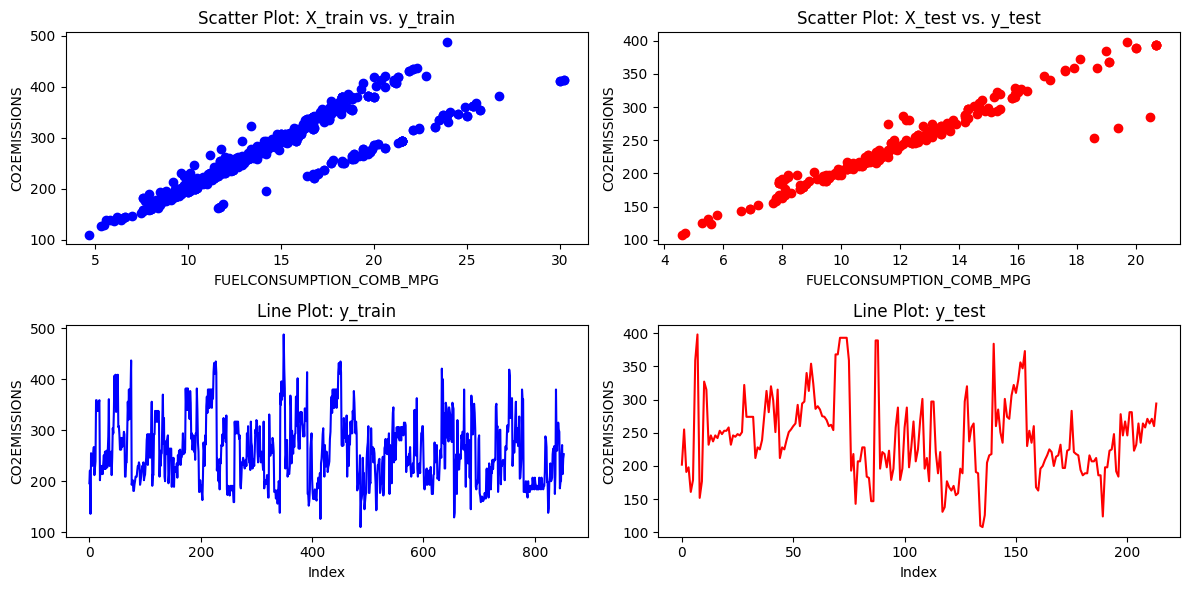

In [8]:
# Scatter plot of X_train vs y_train
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(X_train['FUELCONSUMPTION_CITY'], y_train, color='blue', label='Train Data')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.title('Scatter Plot: X_train vs. y_train')

# Scatter plot of X_test vs y_test
plt.subplot(2, 2, 2)
plt.scatter(X_test['FUELCONSUMPTION_CITY'], y_test, color='red', label='Test Data')
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.title('Scatter Plot: X_test vs. y_test')

# Line plot of y_train to see the distribution of y_train
plt.subplot(2, 2, 3)
plt.plot(range(len(y_train)), y_train, color='blue', label='Train Data')
plt.xlabel('Index')
plt.ylabel('CO2EMISSIONS')
plt.title('Line Plot: y_train')

# Line plot of y_test to see the distribution of y_test
plt.subplot(2, 2, 4)
plt.plot(range(len(y_test)), y_test, color='red', label='Test Data')
plt.xlabel('Index')
plt.ylabel('CO2EMISSIONS')
plt.title('Line Plot: y_test')

plt.tight_layout()
plt.show()


In [9]:
# Normalize the features using Z-score standardization

# Calculate the mean and standard deviation of the training set
mean = X.mean()
std = X.std()

# Normalizing the training set
X_train_normalized = (X_train - mean) / std
# Normalizing the testing set
X_test_normalized = (X_test - mean) / std

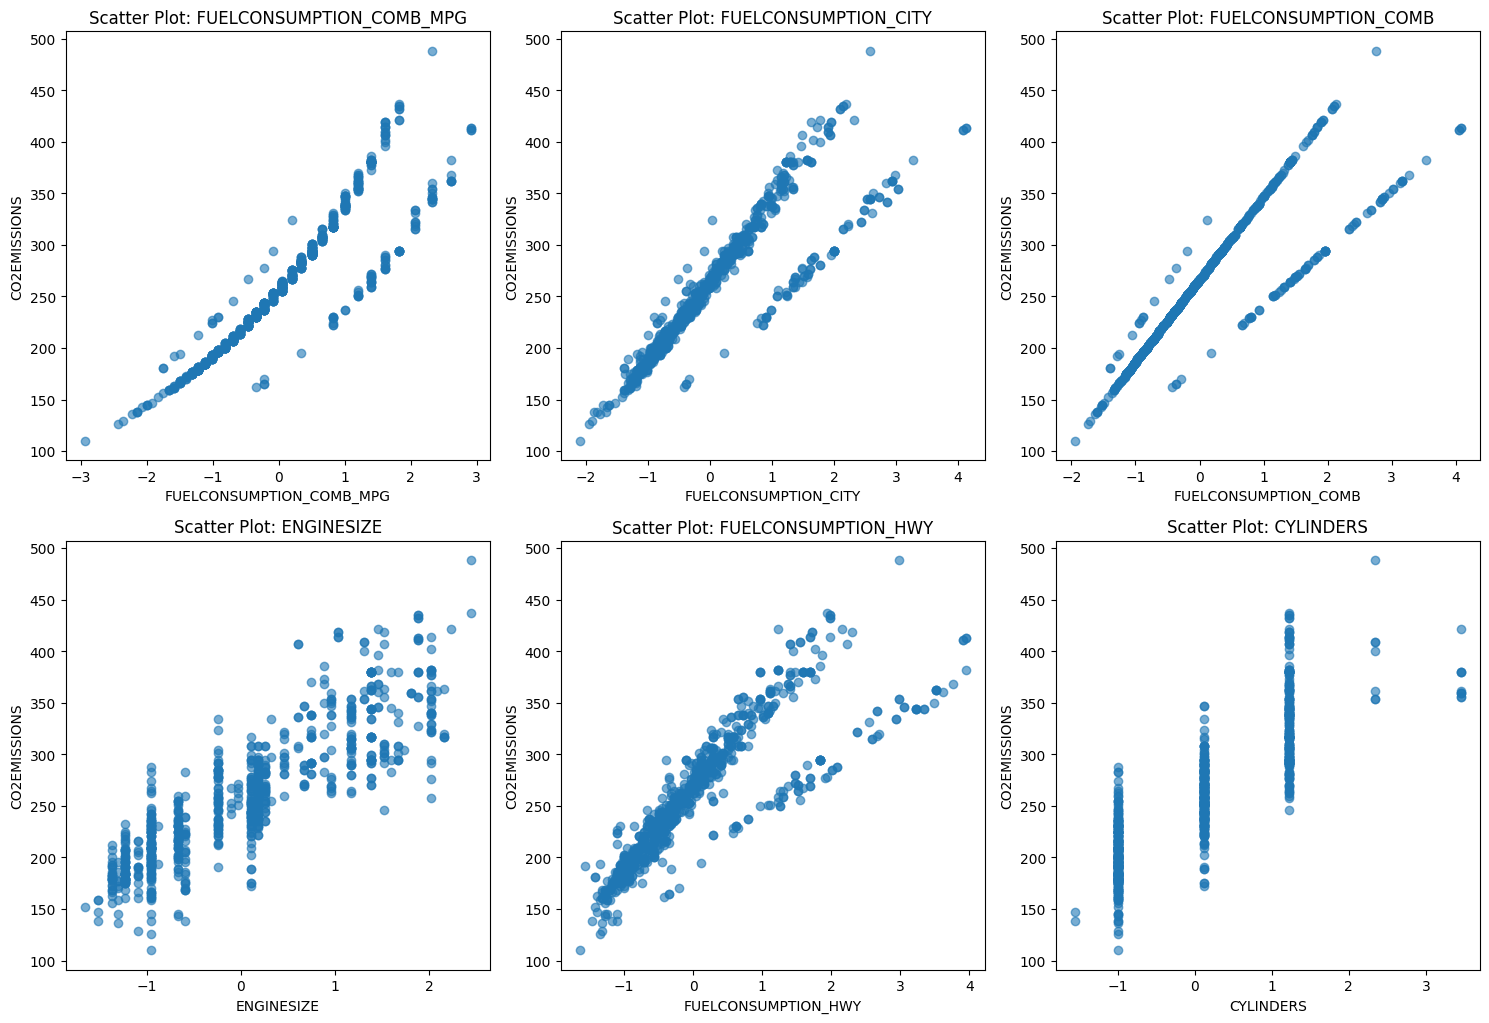

In [10]:
# Geting the list of feature column names
feature_columns = X_train_normalized.columns

# Calculating the number of rows and columns for subplots
num_features = len(feature_columns)
num_rows = (num_features // 3) + 1  # 3 scatter plots per row

# Creating subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
fig.subplots_adjust(hspace=0.5)

# Looping through each feature column and create scatter plots
for i, feature in enumerate(feature_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    ax.scatter(X_train_normalized[feature], y_train, alpha=0.6)
    ax.set_xlabel(feature)
    ax.set_ylabel('CO2EMISSIONS')
    ax.set_title(f'Scatter Plot: {feature}')
    
# If there are empty subplots, removing them
for i in range(num_features, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [11]:

# Defining the gradient descent algorithm for linear regression
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples, num_features = X.shape # Getting the number of samples and features
    weights = np.zeros(num_features) # Initializing the weights to zeros
    bias = 0 # Initializing the bias to zero
    costs = [] # Initializing the list of costs for each iteration

    for _ in range(num_iterations):
        y_pred = np.dot(X, weights) + bias # Calculating the predicted values

        dw = (1/num_samples) * np.dot(X.T, (y_pred - y)) # Calculating the derivative of the weights
        db = (1/num_samples) * np.sum(y_pred - y) # Calculating the derivative of the bias

        weights -= learning_rate * dw # Updating the weights
        bias -= learning_rate * db # Updating the bias

        cost = (1 / (2 * num_samples)) * np.sum((y_pred - y) ** 2) # Calculating the cost
        costs.append(cost) # Adding the cost to the list of costs

    return weights, bias, costs # Returning the weights, bias, and list of costs

def predict(X, weights, bias):
    return np.dot(X, weights) + bias # Returning the predicted values

def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true) # Calculating the mean of the target values
    ss_tot = np.sum((y_true - mean_y) ** 2)  # Calculating the total sum of squares
    ss_res = np.sum((y_true - y_pred) ** 2) # Calculating the residual sum of squares
    return 1 - (ss_res / ss_tot) # Calculating the R-squared value

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2)) # Calculating the root mean squared error





Custom Linear Regression Model:
R-squared: 0.9400834225139414
RMSE: 14.461209700517301


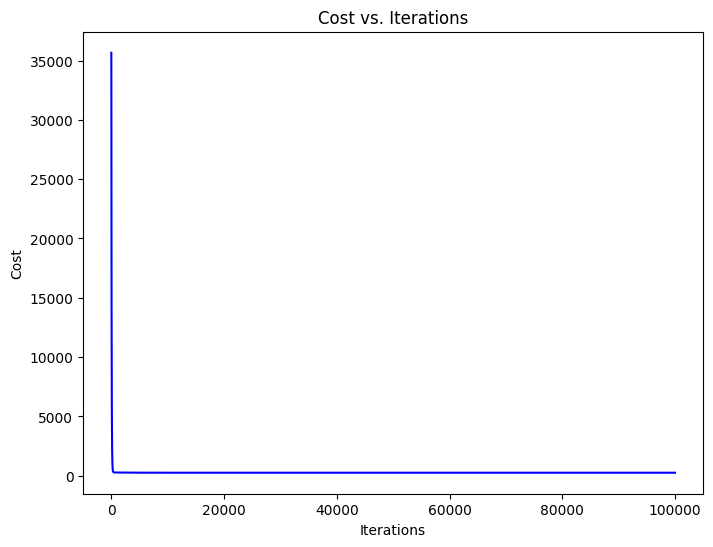

In [12]:
# Training the model
weights, bias, costs = gradient_descent(X_train_normalized, y_train, learning_rate=0.01, num_iterations=100000)

# Making predictions using the trained model
y_pred = predict(X_test_normalized, weights, bias)

# Evaluating the model
r2 = r_squared(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)

print("Custom Linear Regression Model:") 
print("R-squared:", r2)
print("RMSE:", rmse_value)

# Plot the cost against iterations to see how the cost decreases over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

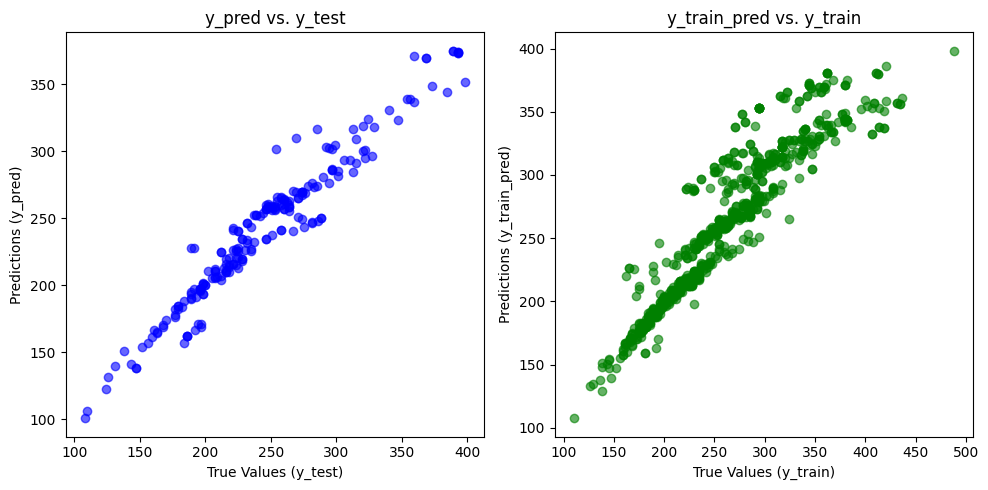

In [13]:


y_train_pred = predict(X_train_normalized, weights, bias)

# Ploting y_pred against y_test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('y_pred vs. y_test')

# Ploting y_train against y_train_pred
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.6)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predictions (y_train_pred)')
plt.title('y_train_pred vs. y_train')

plt.tight_layout()
plt.show()


Custom Linear Regression Model:
R-squared: 0.8960893721232068
RMSE: 19.044128770600004


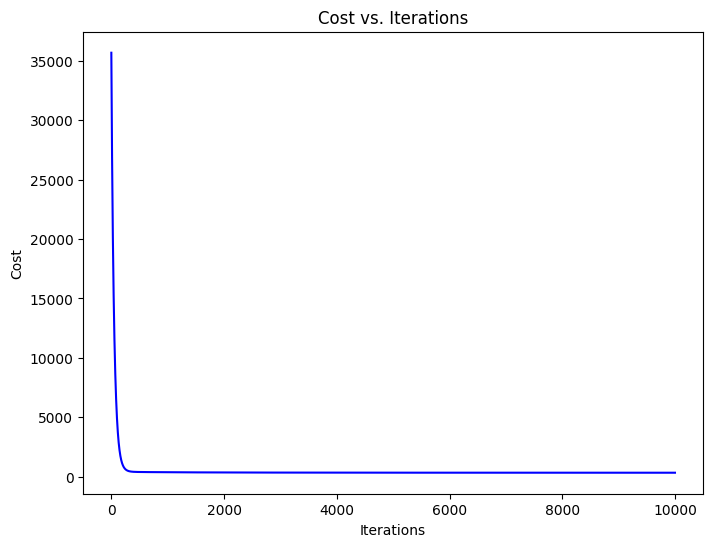

In [14]:
#Doing the same process for a different set of features
#(cylinder and Engine size were dropped because they were not continous values)

X = df[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY']]
y = df["CO2EMISSIONS"]


split_index = int(0.8 * len(df))

X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

mean = X_train.mean()
std = X_train.std()

X_train_normalized = (X_train - mean) / std

X_test_normalized = (X_test - mean) / std


weights, bias, costs = gradient_descent(X_train_normalized, y_train, learning_rate=0.01, num_iterations=10000)


y_pred = predict(X_test_normalized, weights, bias)


r2 = r_squared(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)

print("Custom Linear Regression Model:")
print("R-squared:", r2)
print("RMSE:", rmse_value)


plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

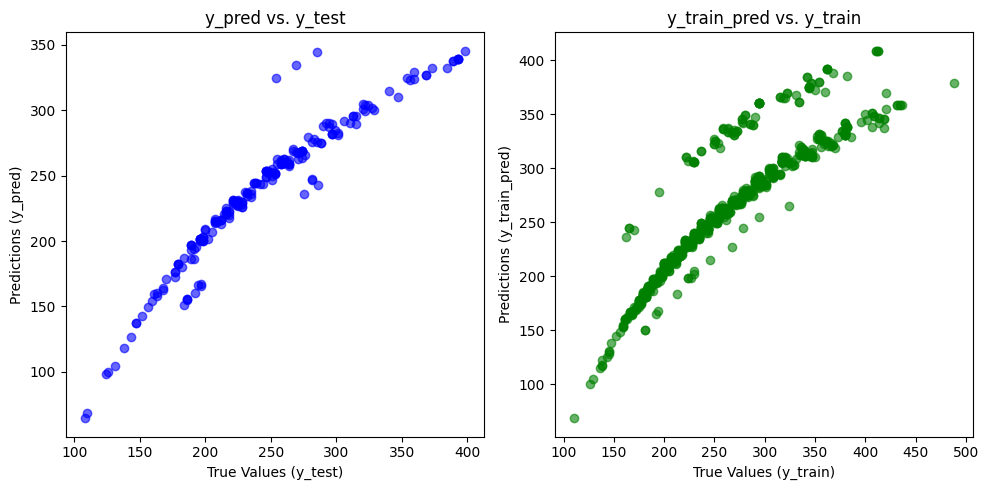

In [15]:


y_train_pred = predict(X_train_normalized, weights, bias)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('y_pred vs. y_test')


plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.6)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predictions (y_train_pred)')
plt.title('y_train_pred vs. y_train')

plt.tight_layout()
plt.show()

Custom Linear Regression Model:
R-squared: 0.8675990814409655
RMSE: 21.496938991137736


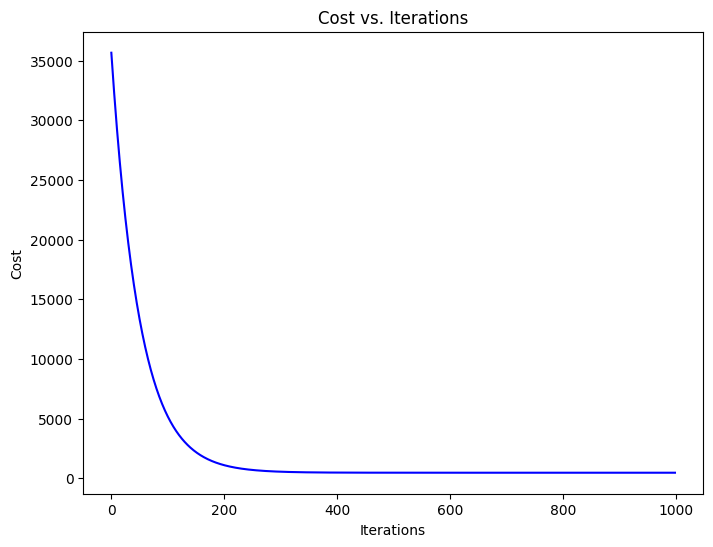

In [16]:
#Reapeating the same process with one feature to test the model and 
# analyze how the model performs with one feature and the plot looks like


X = df[['FUELCONSUMPTION_COMB']]
y = df["CO2EMISSIONS"]


split_index = int(0.8 * len(df))

X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

mean = X_train.mean()
std = X_train.std()

X_train_normalized = (X_train - mean) / std

X_test_normalized = (X_test - mean) / std


weights, bias, costs = gradient_descent(X_train_normalized, y_train, learning_rate=0.01, num_iterations=1000)


y_pred = predict(X_test_normalized, weights, bias)


r2 = r_squared(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)

print("Custom Linear Regression Model:")
print("R-squared:", r2)
print("RMSE:", rmse_value)


plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

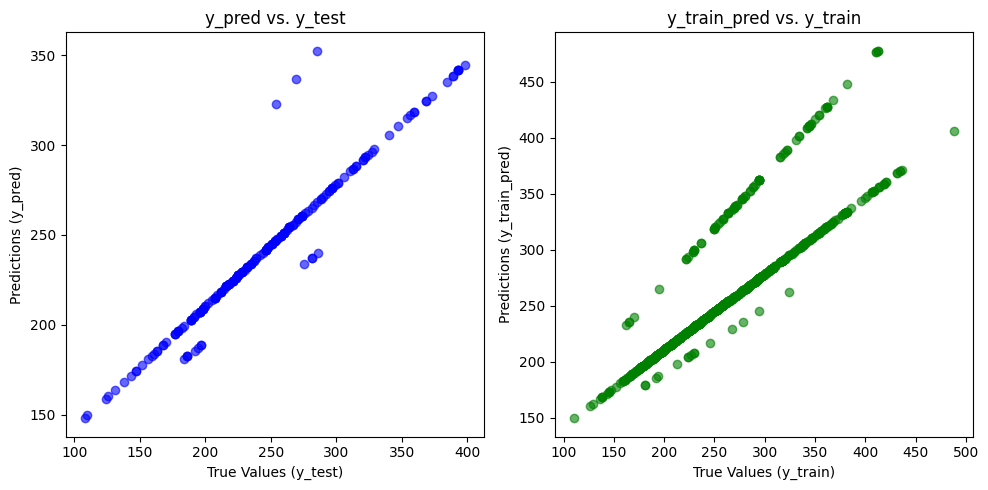

In [17]:
y_train_pred = predict(X_train_normalized, weights, bias)

# Plot y_pred against y_test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('y_pred vs. y_test')

# Plot y_train against y_train_pred
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.6)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predictions (y_train_pred)')
plt.title('y_train_pred vs. y_train')

plt.tight_layout()
plt.show()

In [19]:
df["LOG_FUELCONSUMPTION_COMB"] = np.log(df["FUELCONSUMPTION_COMB"]) #Looking at the results, a slight transformation was required

Custom Linear Regression Model:
R-squared: 0.9427059526791852
RMSE: 14.14118734985778


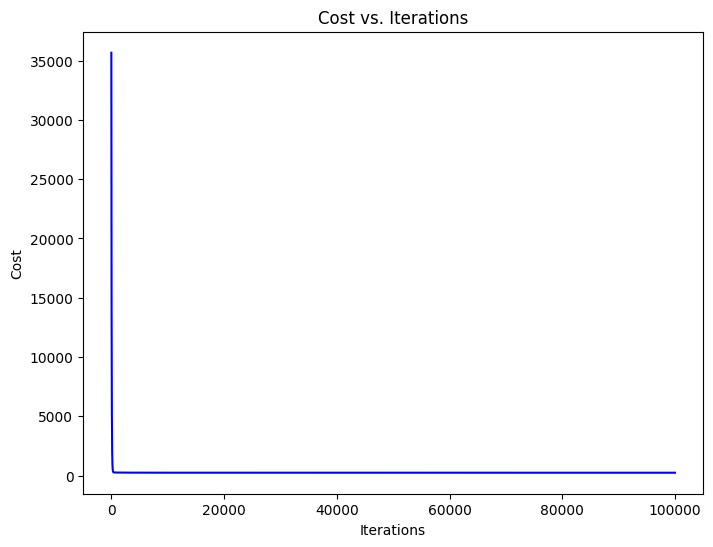

In [21]:
#Doing the same process for a different set of features
#Adding the log transformed feature to the list of features and doing the final test

X = df[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE', 'LOG_FUELCONSUMPTION_COMB']]
y = df["CO2EMISSIONS"]


split_index = int(0.8 * len(df))

X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]

mean = X_train.mean()
std = X_train.std()

X_train_normalized = (X_train - mean) / std

X_test_normalized = (X_test - mean) / std


weights, bias, costs = gradient_descent(X_train_normalized, y_train, learning_rate=0.01, num_iterations=100000)


y_pred = predict(X_test_normalized, weights, bias)


r2 = r_squared(y_test, y_pred)
rmse_value = rmse(y_test, y_pred)

print("Custom Linear Regression Model:")
print("R-squared:", r2)
print("RMSE:", rmse_value)


plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

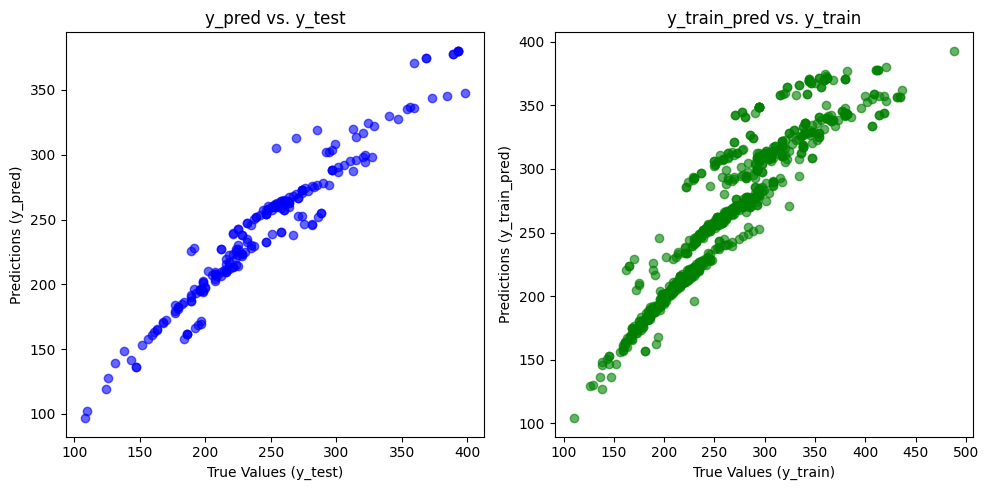

In [22]:
y_train_pred = predict(X_train_normalized, weights, bias)

# Plot y_pred against y_test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('y_pred vs. y_test')

# Plot y_train against y_train_pred
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.6)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predictions (y_train_pred)')
plt.title('y_train_pred vs. y_train')

plt.tight_layout()
plt.show()

Scikit-Learn Linear Regression Model:
R-squared (Test): 0.9424393111070353
RMSE (Test): 14.174055088626991


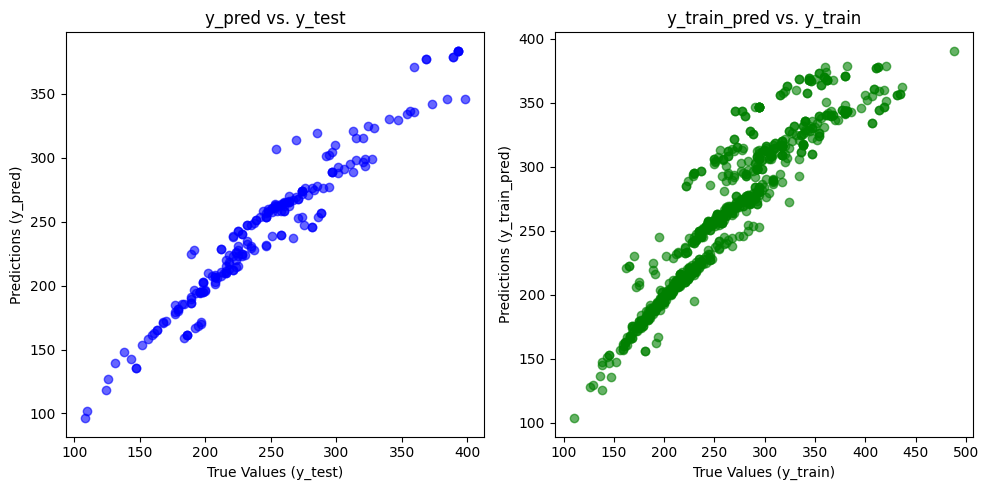

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#Same process using scikit-learn

X = df[['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_HWY', 'CYLINDERS', 'ENGINESIZE', 'LOG_FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

split_index = int(0.8 * len(df))

X_train, y_train = X.iloc[:split_index], y.iloc[:split_index]
X_test, y_test = X.iloc[split_index:], y.iloc[split_index:]


# Training a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluating the model using scikit-learn
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("Scikit-Learn Linear Regression Model:")
print("R-squared (Test):", r2_test)
print("RMSE (Test):", rmse_test)

# Plot y_pred against y_test
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title('y_pred vs. y_test')

# Plot y_train against y_train_pred
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred, color='green', alpha=0.6)
plt.xlabel('True Values (y_train)')
plt.ylabel('Predictions (y_train_pred)')
plt.title('y_train_pred vs. y_train')

plt.tight_layout()
plt.show()


In [24]:
print("Final Results:")
print("Custom Linear Regression Model:")
print("R-squared:", r2)
print("RMSE:", rmse_value)
print("\nScikit-Learn Linear Regression Model:")
print("R-squared (Test):", r2_test)
print("RMSE (Test):", rmse_test)


Final Results:
Custom Linear Regression Model:
R-squared: 0.9427059526791852
RMSE: 14.14118734985778

Scikit-Learn Linear Regression Model:
R-squared (Test): 0.9424393111070353
RMSE (Test): 14.174055088626991
